# Exploratory Data Analysis (EDA) for Sales Data

This notebook contains a comprehensive analysis of the sales data, including data overview, statistical analysis, and visualizations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import chi2_contingency

sns.set_palette('husl')

# Read the data
df = pd.read_csv('data/sazerac_df.csv', parse_dates=["date"])

## 1. Data Overview

First, let's examine the basic structure and content of our dataset.

In [9]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nData Types:")
df.info()

Dataset Shape: (1614362, 21)

Columns:
['invoice_line_no', 'date', 'store', 'name', 'address', 'city', 'zipcode', 'store_location', 'county', 'category', 'category_name', 'itemno', 'im_desc', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'sale_bottles', 'sale_dollars', 'sale_liters', 'sale_gallons']

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614362 entries, 0 to 1614361
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   invoice_line_no      1614362 non-null  object        
 1   date                 1614362 non-null  datetime64[ns]
 2   store                1614362 non-null  int64         
 3   name                 1614362 non-null  object        
 4   address              1614362 non-null  object        
 5   city                 1614362 non-null  object        
 6   zipcode              1614362 non-null  float64       
 7   store_locat

### Initial Observations:
1. The dataset contains 1,614,362 rows and 21 columns
2. We have a mix of data types:
   - 1 datetime column (date)
   - 6 float64 columns
   - 6 int64 columns
   - 8 object (string) columns
3. Memory usage is approximately 258.6 MB

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


### Data Quality Check:
The dataset appears to be clean with no missing values, which is excellent for our analysis.

In [11]:
# Basic statistical description
df.describe()

,date,store,zipcode,category,itemno,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
count,1614362,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06,1.614362e+06
mean,2023-04-18 05:35:30.057570816,4.665714e+03,5.125129e+04,1.080238e+06,7.191410e+04,1.299411e+01,7.068019e+02,1.257925e+01,1.886307e+01,1.867019e+01,1.479511e+02,1.079126e+01,2.845453e+00
min,2021-04-01 00:00:00,2.106000e+03,5.000200e+04,1.011100e+06,4.031000e+03,1.000000e+00,5.000000e+01,8.900000e-01,1.340000e+00,-7.680000e+02,-8.355840e+03,-1.344000e+03,-3.550400e+02
25%,2022-05-24 00:00:00,2.707000e+03,5.031500e+04,1.031100e+06,3.808800e+04,6.000000e+00,5.000000e+01,4.940000e+00,7.410000e+00,3.000000e+00,5.772000e+01,7.500000e-01,1.900000e-01
50%,2023-05-12 00:00:00,4.609000e+03,5.105800e+04,1.081400e+06,6.486700e+04,1.200000e+01,7.500000e+02,7.060000e+00,1.059000e+01,6.000000e+00,7.740000e+01,4.800000e+00,1.260000e+00
75%,2024-03-29 00:00:00,5.655000e+03,5.230200e+04,1.081600e+06,8.414100e+04,1.200000e+01,1.000000e+03,1.200000e+01,1.800000e+01,1.200000e+01,1.548000e+02,1.050000e+01,2.770000e+00
max,2025-01-31 00:00:00,1.054900e+04,5.722200e+04,1.901200e+06,9.959050e+05,4.800000e+01,5.250000e+03,3.750000e+03,5.625000e+03,7.920000e+03,5.821200e+04,8.736000e+03,2.307800e+03
std,NaN,1.826053e+03,9.875618e+02,1.103992e+05,1.042049e+05,1.219467e+01,6.343618e+02,1.967252e+01,2.950412e+01,5.227029e+01,4.650109e+02,5.540455e+01,1.463649e+01


### Statistical Insights:
1. Date Range: From 2021-04-01 to 2025-01-31 (approximately 4 years of data)
2. Store Information:
   - Store IDs range from 2106 to 10549
   - Average store ID is around 4665
3. Sales Metrics:
   - Bottle sales range from -768 to 7920 units
   - Sale dollars range from -$8,355.84 to $58,212.00
   - Negative values might indicate returns or corrections
4. Product Characteristics:
   - Bottle volumes range from 50ml to 5250ml
   - Pack sizes range from 1 to 48 units

## 2. Temporal Analysis

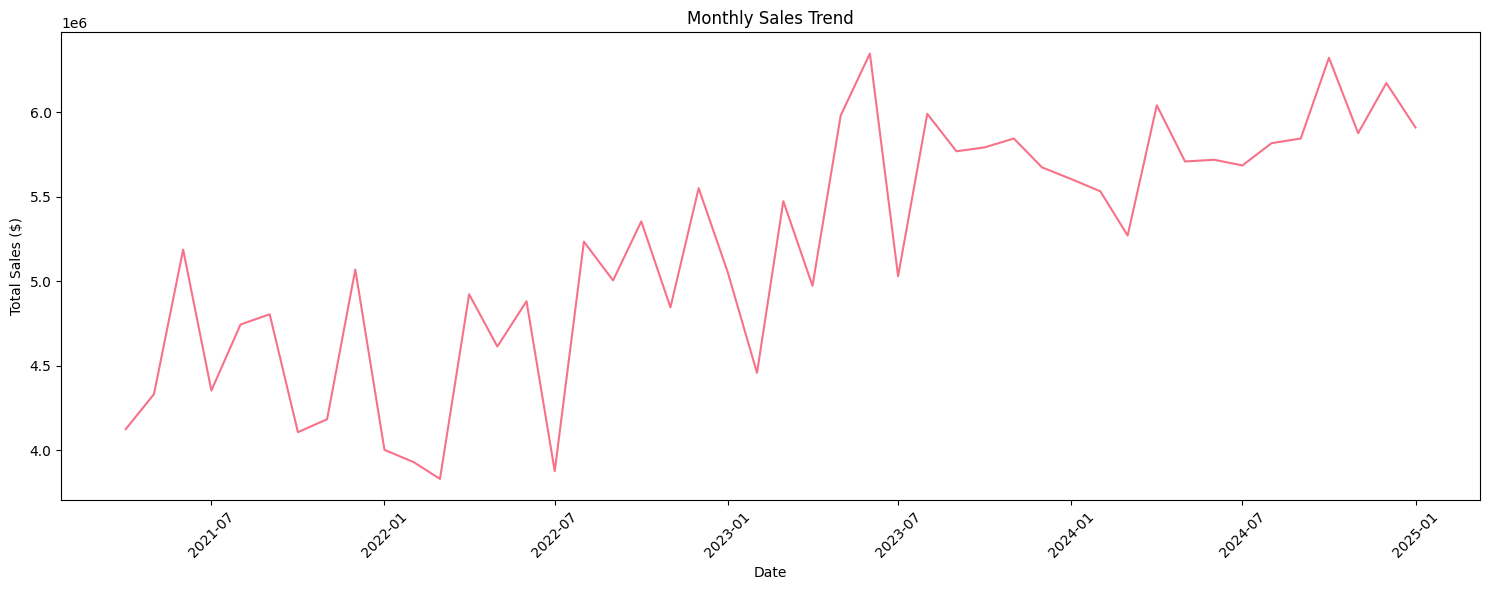

In [12]:
# Create time-based aggregations
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

# Monthly sales trend
monthly_sales = df.groupby(['year', 'month'])['sale_dollars'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['date'], monthly_sales['sale_dollars'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The monthly sales trend shows a clear overall upward trajectory from 2021 through 2024, indicating growing consumer demand or possible expansion in distribution. The data contains strong seasonal fluctuations, with multiple local maximums and minimums likely tied to holiday periods, promotions, or warm-weather spikes in demand. While the trendline rises, we can notice a fall in sales between mid-2021 and mid-2022, which may reflect consequences from COVID-19. By late 2023, the volatility seems to reduce, suggesting smarket tabilization. These characteristics confirm the data is nonstationary and seasonally influenced, making it well-suited for time-series models that incorporate lag features, rolling trends, and temporal signals like month, holidays, or store-level variation.

### Temporal Patterns:
1. The visualization shows the monthly sales trend over time
2. We can observe any seasonal patterns or trends in the data

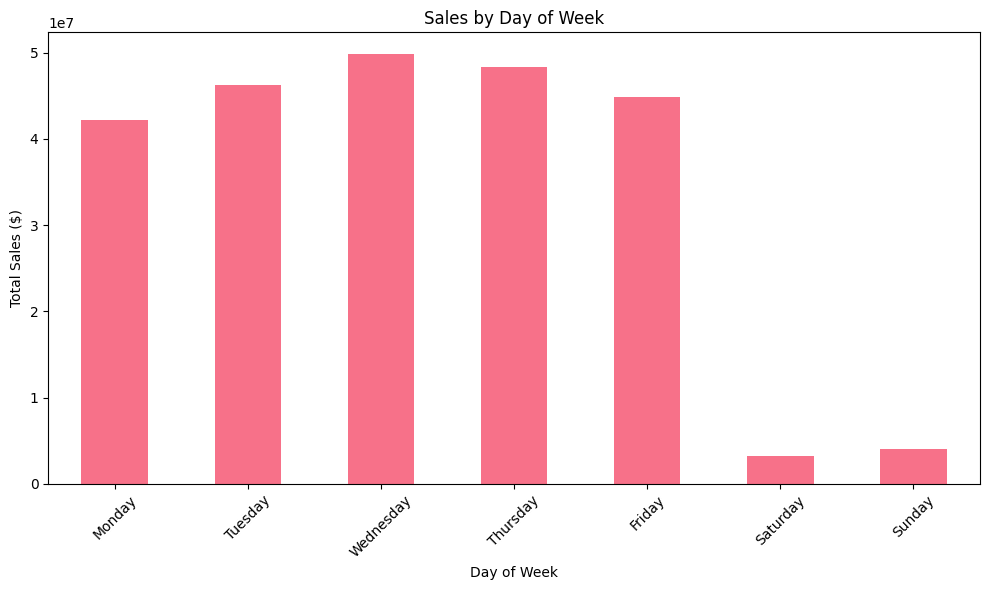

In [15]:
# Day of week analysis
dow_sales = df.groupby('day_of_week')['sale_dollars'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
dow_sales.plot(kind='bar')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most deliveries and invoices are processed Monday through Friday, aligned with business hours and staffing of various distribution systems or vendor operations. Predictive models must recognize that weekend sales are structurally low by design, not due to market.

## 3. Product Analysis

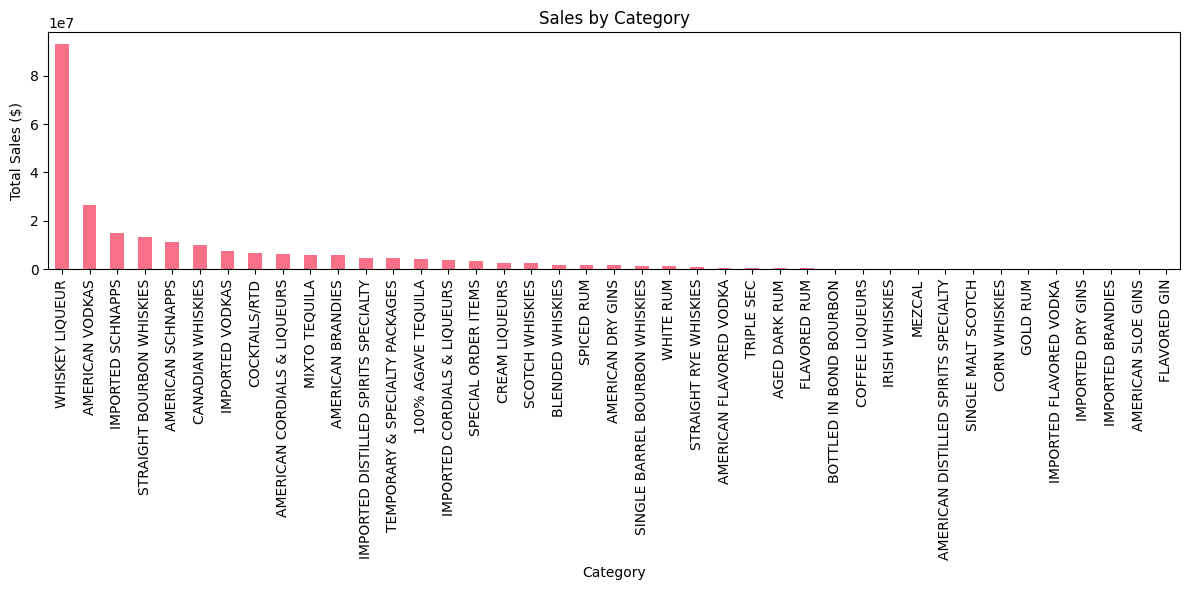

In [19]:
# Category analysis
category_sales = df.groupby('category_name')['sale_dollars'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The distribution is highly skewed, small number of liquor types dominate the transactions. Whiskey Liquor is by far the top-performing category, followed distantly by American Vodkas, Imported Schnapps, and various other types of whiskies and schnapps. It would be beneficial to encode category in a way that preserves this hierarchy, as most categories contribute negligibly to overall trends. Categorical dimensionality can be justifiably reduced by grouping low-volume categories into an "Other" bucket.

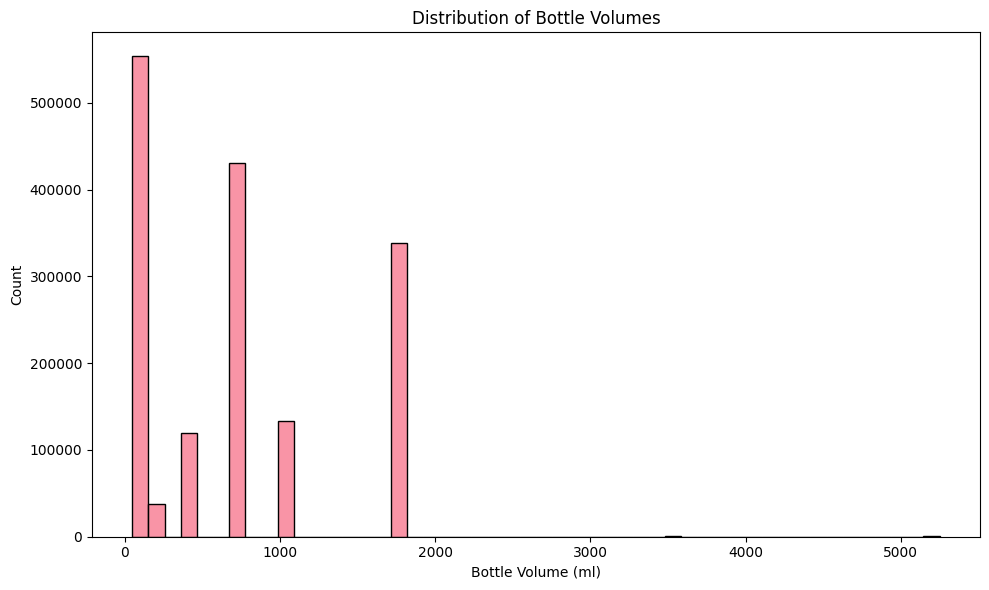

In [20]:
# Bottle volume analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bottle_volume_ml', bins=50)
plt.title('Distribution of Bottle Volumes')
plt.xlabel('Bottle Volume (ml)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Peaks in values correspond to industry-standard packaging formats, which suggests that bottle_volume_ml is more categorical in practice than continuous. The presence of extreme outliers beyond 2000 ml is negligible and could be cleaned or grouped under a "large format" category to reduce noise.

## 4. Store Analysis

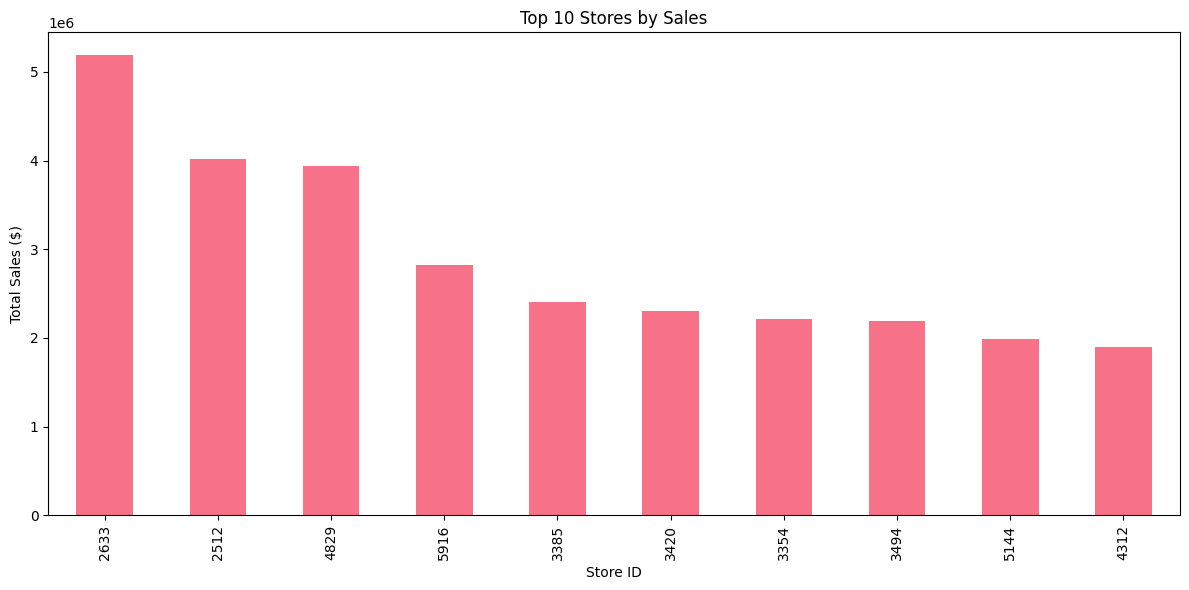

In [21]:
# Top stores by sales
top_stores = df.groupby('store')['sale_dollars'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_stores.plot(kind='bar')
plt.title('Top 10 Stores by Sales')
plt.xlabel('Store ID')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

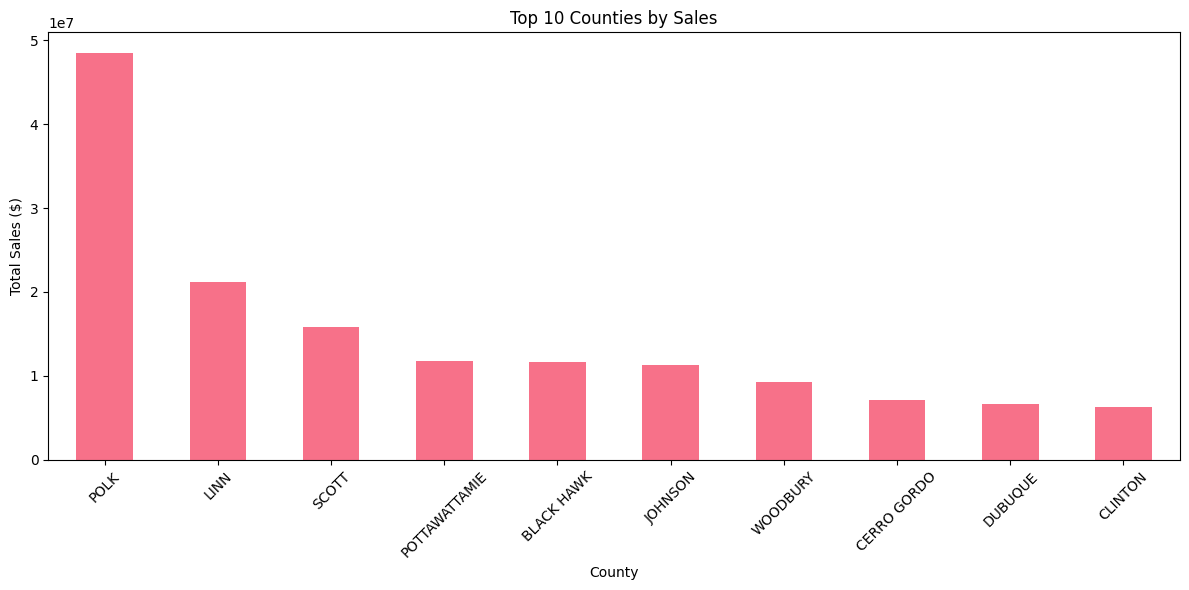

In [22]:
# Geographic analysis
county_sales = df.groupby('county')['sale_dollars'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
county_sales.plot(kind='bar')
plt.title('Top 10 Counties by Sales')
plt.xlabel('County')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart of the top 10 counties by total sales shows a steep drop-off from Polk County, which dominates with nearly double the sales of the next highest county, Linn. The remaining counties have a more gradual decline.

## 5. Correlation Analysis

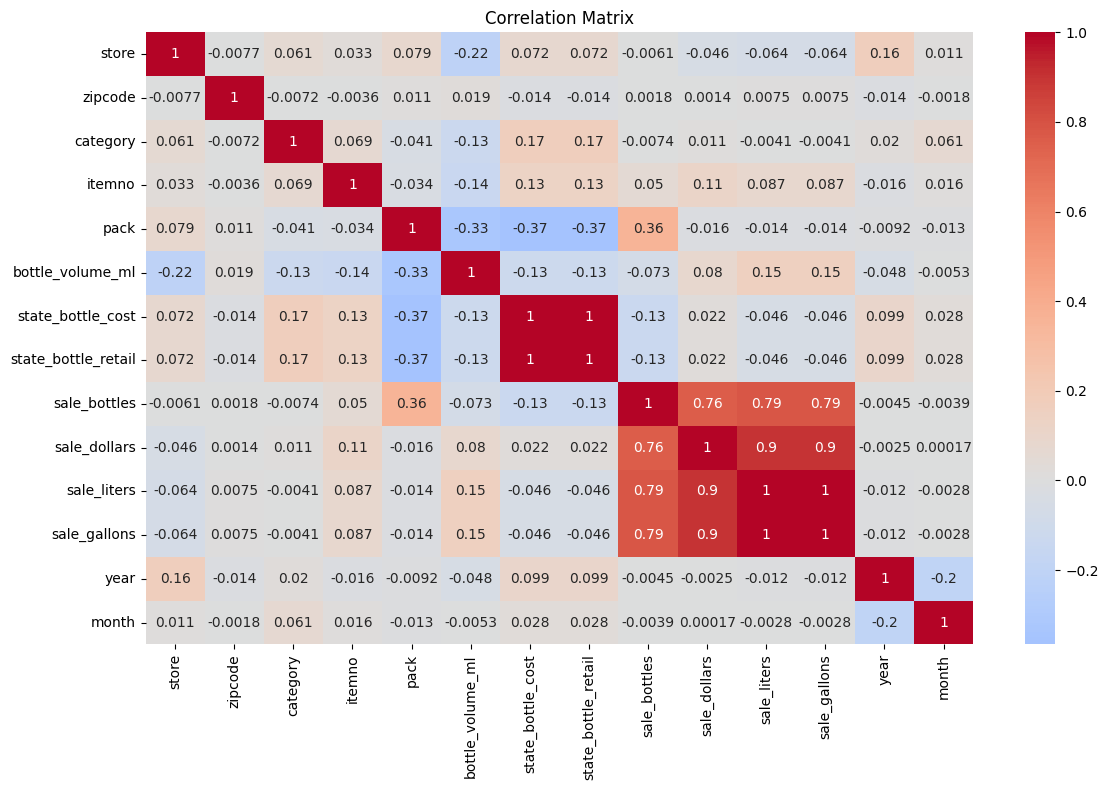

In [23]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

1. sale_bottles, sale_liters, and sale_gallons are all highly correlated, hence they are functionally redundant.
2. sale_dollars correlates strongly with sale_bottles (0.76) and even more with sale_liters and sale_gallons (0.90), reinforcing that revenue is volume-driven.
3. pack has a moderate positive correlation with sale_bottles (0.36), suggesting larger packs drive higher unit movement.
4. bottle_volume_ml shows negative correlation with pack (-0.33) and weak negative correlation with store, hinting that high-volume bottles are less common in stores with larger pack sizes.
5. state_bottle_cost and state_bottle_retail are perfectly correlated (1.0), implying they are identical or one is derived from the other — only one should be kept.
6. category has weak positive correlation with price variables (0.17), indicating slight price variation across categories.

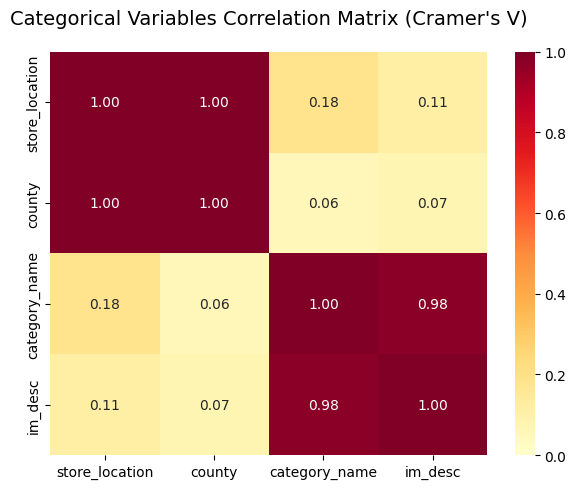


Interpretation of Cramer's V values:
0.0 - 0.1: Very weak association
0.1 - 0.2: Weak association
0.2 - 0.3: Moderate association
0.3 - 0.4: Relatively strong association
0.4 - 0.5: Strong association
> 0.5: Very strong association


In [ ]:
def cramers_v(confusion_matrix):
    """
    Calculate Cramer's V statistic for measuring the strength of association
    between two categorical variables.
    
    Parameters:
    confusion_matrix : array-like
        The contingency table of the two categorical variables
        
    Returns:
    float
        Cramer's V statistic (between 0 and 1)
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

categorical_cols = ['store_location', 'county', 'category_name', 'im_desc']

# Create correlation matrix for categorical variables
categorical_corr = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))), 
                              index=categorical_cols, 
                              columns=categorical_cols)

# Calculate Cramer's V for each pair of categorical variables
for i in range(len(categorical_cols)):
    for j in range(len(categorical_cols)):
        if i <= j:  # Only calculate upper triangle to avoid redundancy
            # Create contingency table
            contingency = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
            # Calculate Cramer's V
            categorical_corr.iloc[i, j] = cramers_v(contingency)
            categorical_corr.iloc[j, i] = categorical_corr.iloc[i, j]  # Mirror the values


plt.figure(figsize=(6, 5))
sns.heatmap(categorical_corr, 
            annot=True,  # Show correlation values
            cmap='YlOrRd',  # Color scheme
            vmin=0, 
            vmax=1,
            fmt='.2f')  # Format numbers to 2 decimal places
plt.title("Categorical Variables Correlation Matrix (Cramer's V)", 
          fontsize=14, 
          pad=20)
plt.tight_layout()
plt.show()

# Interpretation guide
print("\nInterpretation of Cramer's V values:")
print("0.0 - 0.1: Very weak association")
print("0.1 - 0.2: Weak association")
print("0.2 - 0.3: Moderate association")
print("0.3 - 0.4: Relatively strong association")
print("0.4 - 0.5: Strong association")
print("> 0.5: Very strong association")

1. category_name and im_desc are almost perfectly correlated, meaning they carry nearly identical information - keep only one to avoid redundancy.
2. store_location and county are perfectly correlated, indicating one is a direct mapping of the other - treat one as redundant.
3. Cross-group correlations (between location-based and product-based variables) are weak, suggesting geography and product attributes are statistically independent.
4. The low correlation between store_location and category_name (0.18) implies minimal geographic specialization in product types.

## 6. Price Analysis

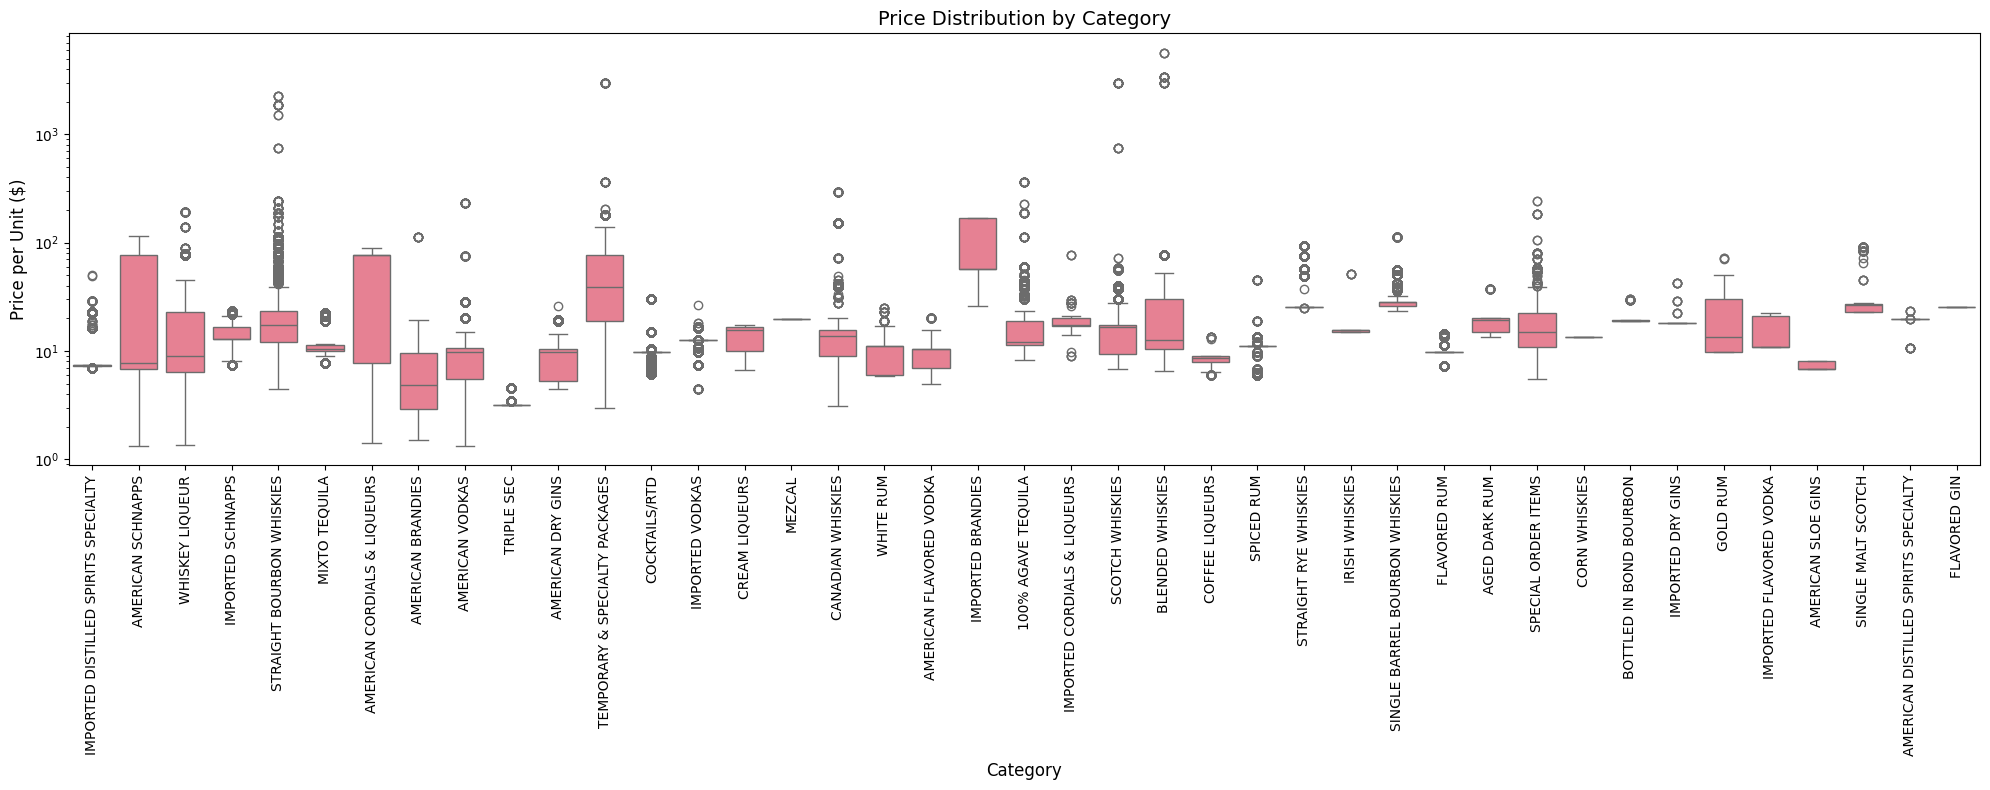

In [ ]:
# Calculate price per unit
df['price_per_unit'] = df['sale_dollars'] / df['sale_bottles']

plt.figure(figsize=(20, 8)) 
sns.boxplot(data=df, x='category_name', y='price_per_unit')
plt.title('Price Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price per Unit ($)', fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log') 
plt.tight_layout()
plt.show()

1. The distribution of unit prices across categories is highly skewed, with several categories showing extreme outliers and wide price ranges.
2. Premium categories like Single Malt Scotch, Imported Brandies, and Scotch Whiskies exhibit the highest price variability and upper price limits, often exceeding $1,000 per unit.
3. Mass-market categories such as American Vodkas, American Schnapps, and Mixto Tequila show tight, low-price clustering around $5–$20, indicating consistency and affordability.